# Chapter 13 - Loading and Preprocessing Data with TensorFlow

## Setup

In [54]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB or IS_KAGGLE:
    %pip install -q -U tfx
    print("You can safely ignore the package incompatibility errors.")

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Datasets

In [55]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB or IS_KAGGLE:
    %pip install -q -U tfx
    print("You can safely ignore the package incompatibility errors.")

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Datasets

In [3]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [4]:
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


## Chaining Transformations

In [5]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
  print(item)


tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [6]:
dataset = dataset.map(lambda x:x*2)
for item in dataset:
  print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [7]:
dataset = dataset.apply(tf.data.experimental.unbatch())
for item in dataset:
  print(item)

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=

In [8]:
dataset = dataset.filter(lambda x: x<10)
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [9]:
for item in dataset.take(3):
  print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [10]:
X_mean, X_std = []
n_inputs = 8

def preprocess(line):
  defs = [0.] * n_inputs * [tf.constant([], dtype=tf.float32)]
  fields = tf.io.decoe_csv(line,record_defautls=defs)
  x = tf.stack(fields[:-1])
  y = tf.stack(fields[-1:])
  return (x - X_mean) / X_std, y


ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffter_size=10000,
                       n_parse_threads=5, batch_size=32):
  dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
  dataset = dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length = n_readers, num_parallel_calls = n_read_threads)
  dataset = dataset.shuffle(shuffle_buffter_size)
  dataset = dataset.map(preprocess, num_parallel_calls = n_parse_threads)
  dataset = dataset.batch(batch_size)
  return dataset.prefetch(1)


In [11]:
train_filepaths, valid_filepaths, test_filepaths = "", "", ""

train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

NameError: name 'csv_reader_dataset' is not defined

## The TFRecord binary format

In [12]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
  f.write(b"This is the first record")
  f.write(b"And this is the second record")

In [13]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
  print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [14]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
  print("")

In [15]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"], compression_type="GZIP")

### A Brief Intro to Protocol Buffers

In [16]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email =3;
}

Overwriting person.proto


### TensorFlow Protobuffs

In [17]:
#from tensorflow.train import BytesList, FloatList, Int64List
#from tensorflow.train import Feature, Features, Example
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [18]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(features = Features(feature = {
  "name" : Feature(bytes_list = BytesList(value=[b"Alice"])),
  "id" : Feature(int64_list = Int64List(value=[123])),
  "emails" : Feature(bytes_list = BytesList(value=[b"a@b.com", b"c@d.com"]))
}))

In [19]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
  f.write(person_example.SerializeToString())

### Loading and Parsing Examples

In [20]:
feature_description = {
  "name" : tf.io.FixedLenFeature([], tf.string, default_value=""),
  "id" : tf.io.FixedLenFeature([], tf.int64, default_value=0),
  "emails" : tf.io.VarLenFeature(tf.string),
}

for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
  parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

In [21]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [22]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [23]:
dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)
for serialized_examples in dataset:
  parsed_examples = tf.io.parse_example(serialized_examples, feature_description)

In [24]:
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
  serialized_sequence_example, context_feature_descriptions, sequence_feature_descriptions
)
parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_lists["context"])

NameError: name 'serialized_sequence_example' is not defined

## Preprocessing the Input features

In [25]:
X_train = []
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()
model = keras.models.Sequential([
  keras.layers.Lambda(lambda inputs : (inputs - means) / (stds + eps))
])

C:\Users\ghafr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghafr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\ghafr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ghafr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\ghafr\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [26]:
class Standardization(keras.layers.Layer):
  def adapt(self, data_sample):
    self.means_ = np.mean(data_sample, axis=0, keepdims=True)
    self.stds_ =  np.std(data_sample, axis=0, keepdims=True)
  def call(self, inputs):
    return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [27]:
std_layer = Standardization()
std_layer.adapt(data_sample)

NameError: name 'data_sample' is not defined

In [28]:
model = keras.models.Sequential([])
model.add(std_layer)
# Create the rest of the layer
model.compile([])
#model.fit([])

In [29]:
vocab= ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
indices = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

In [30]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [31]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [32]:
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init)

In [33]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.18062854, 0.4275993 ],
       [0.529361  , 0.46778214],
       [0.42325604, 0.60634124],
       [0.81377685, 0.06033444],
       [0.9822788 , 0.6797197 ],
       [0.04322195, 0.6149744 ],
       [0.67132413, 0.2255696 ]], dtype=float32)>

In [34]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [35]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.81377685, 0.06033444],
       [0.04322195, 0.6149744 ],
       [0.529361  , 0.46778214],
       [0.529361  , 0.46778214]], dtype=float32)>

In [36]:
embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets, output_dim=embedding_dim)

In [37]:
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.02378371,  0.00563369],
       [ 0.02822248,  0.0301195 ],
       [ 0.02673396,  0.04174472],
       [ 0.02673396,  0.04174472]], dtype=float32)>

In [38]:
regular_inputs = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[],dtype=tf.string)
cat_indices =  keras.layers.Lambda(lambda cats: table.lookup(cats))
(categories)
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)
(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_inputs, categories], outputs=[outputs])

TypeError: 'NoneType' object is not subscriptable

## TF Transform

In [39]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

TF Transform is not installed. Try running: pip3 install -U tensorflow-transform


## TensorFlow Datasets

In [40]:
import tensorflow_datasets as tfds

dataset = tfds.load(name="mnist")
mnist_train, mnist_test = dataset["train"], dataset["test"]
 

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [41]:
mnist_train = mnist_train.shuffle(10000).batch(32).prefetch(1)
for item in mnist_train:
  images = item["image"]
  labels = item["label"]
  

NameError: name 'mnist_train' is not defined

In [42]:
mnist_train = mnist_train.shuffle(10000).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)

NameError: name 'mnist_train' is not defined

In [43]:
dataset = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = dataset["train"].prefetch(1)

NameError: name 'tfds' is not defined

In [44]:
model = keras.models.Sequential([])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd")
model.fit(mnist_train, epochs=5)

NameError: name 'mnist_train' is not defined

## Exercice 9.

In [45]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, y_train = X_train_full[5000:], y_train_full[5000:]
X_val, y_val = X_train_full[:5000], y_train_full[:5000]

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(len(X_test))

In [57]:
#Save each dataste into a TFRecord File
# with tf.io.TFRecordWriter("my_data.tfrecord") as f:
#   f.write(b"This is the first record")
#   f.write(b"And this is the second record")

def serialize_data(image,label):
  image_data = tf.io.serialize_tensor(image)
  return Example(
    features = Features(
      feature = {
        "image": Feature(bytes_list=BytesList(value=[image_data.numpy()])),
        "label": Feature(int64_list=Int64List(value=[label]))
        
      }
    ) 
  )


In [58]:
for image, label in valid_set.take(1):
    print(serialize_data(image,label))

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\010\022\002\010\034\022\002\010\034\"\220\006\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\00

In [59]:
from contextlib import ExitStack
import os

def write_tfrecords(name, dataset, n_shards=10):
    paths = ["{}.tfrecord-{:05d}-of-{:05d}".format(name, index, n_shards)
     for index in range(n_shards)]
    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path))
                    for path in paths]
        for index, (image,label) in dataset.enumerate():
            shard = index % n_shards
            example = serialize_data(image, label)
            writers[shard].write(example.SerializeToString())
    return paths

In [60]:
train_filepaths = write_tfrecords("./data/my_fashion_mnist.train",train_set)
test_filepaths = write_tfrecords("./data/my_fashion_mnist.test",test_set)
valid_filepaths = write_tfrecords("./data/my_fashion_mnist.valid",valid_set)

In [63]:
def preprocess(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64, default_value= -1)
    }
    example = tf.io.parse_single_example(tfrecord, feature_descriptions)
    image = tf.io.parse_tensor(example["image"], out_type=tf.uint8)
    image = tf.reshape(image,shape=[28,28])
    return image,example["label"]


def mnist_dataset(filepaths, n_read_threads=5, shuffle_buffer_size=None,n_parse_threads=5, batch_size=32, cache=True):
    dataset = tf.data.TFRecordDataset(filepaths,
                                    num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [64]:
train_set = mnist_dataset(train_filepaths, shuffle_buffer_size=60000)
valid_set = mnist_dataset(valid_filepaths)
test_set = mnist_dataset(test_filepaths)

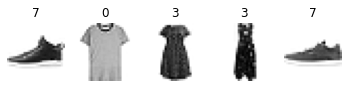

In [66]:
for X,y in train_set.take(1):
    for i in range(5):
        plt.subplot(1, 5, i +1)
        plt.imshow(X[i].numpy(), cmap="binary")
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [69]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

standardization = Standardization(input_shape=[28,28])
# Now its just standardization = keras.layers.Normalization()

sample_image_batches = train_set.take(100).map(lambda image, label: image)
sample_images = np.concatenate(list(sample_image_batches.as_numpy_iterator()),
                               axis=0).astype(np.float32)
standardization.adapt(sample_images)

model = keras.models.Sequential([
    standardization,
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="nadam", metrics=["accuracy"])


In [70]:
from datetime import datetime
logs = os.path.join(os.curdir, "my_logs",
                     "run_"+datetime.now().strftime("%Y%m%d_%H%M%S"))
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=logs, histogram_freq=1, profile_batch=10
)

model.fit(train_set, epochs=5, validation_data = valid_set, callbacks=[tensorboard_cb])

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4529 - accuracy: 0.8408 - val_loss: 0.3942 - val_accuracy: 0.8590
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8789 - val_loss: 0.4163 - val_accuracy: 0.8804
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2992 - accuracy: 0.8914 - val_loss: 0.3563 - val_accuracy: 0.8838
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2768 - accuracy: 0.9007 - val_loss: 0.3447 - val_accuracy: 0.8808
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2530 - accuracy: 0.9077 - val_loss: 0.3489 - val_accuracy: 0.8890


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

## Exercise 10.

In [53]:
from pathlib import Path

DOWNLOAD_ROOT = "https://ai.stanford.edu/~amaas/data/sentiment/"
FILENAME= "aclImdb_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME, DOWNLOAD_ROOT + FILENAME, extract=True)
path = Path(filepath).parent / "aclImdb"
path

WindowsPath('C:/Users/ghafr/.keras/datasets/aclImdb')

In [56]:
for name, subdirs, files in os.walk(path):
  indent = len(Path(name).parts) - len(path.parts)
  print("   " * indent + Path(name).parts[-1] + os.sep)
  for index, filename in enumerate(sorted(files)):
    if index == 3:
      print("   " * (indent + 1) + "...")
      break
    print("   " * (indent + 1) + filename)

aclImdb\
   README
   imdb.vocab
   imdbEr.txt
   test\
      labeledBow.feat
      urls_neg.txt
      urls_pos.txt
      neg\
         0_2.txt
         10000_4.txt
         10001_1.txt
         ...
      pos\
         0_10.txt
         10000_7.txt
         10001_9.txt
         ...
   train\
      labeledBow.feat
      unsupBow.feat
      urls_neg.txt
      ...
      neg\
         0_3.txt
         10000_4.txt
         10001_4.txt
         ...
      pos\
         0_9.txt
         10000_8.txt
         10001_10.txt
         ...
      unsup\
         0_0.txt
         10000_0.txt
         10001_0.txt
         ...


In [57]:
def review_paths(dirpath):
  return [str(path) for path in dirpath.glob("*.txt")]

train_pos = review_paths(path / "train" / "pos")
train_neg = review_paths(path / "train" / "neg")
test_valid_pos = review_paths(path / "test" / "pos")
test_valid_neg = review_paths(path / "test" / "neg")

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

(12500, 12500, 12500, 12500)

In [59]:
np.random.seed(42)
np.random.shuffle(test_valid_pos)

test_pos = test_valid_pos[:5000]
test_neg = test_valid_neg[:5000]
valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

In [62]:
def imdb_dataset(filepaths_positive, filepaths_negative):
    reviews = []
    labels = []
    for filepaths, label in ((filepaths_negative, 0), (filepaths_positive, 1)):
        for filepath in filepaths:
            with open(filepath) as review_file:
                reviews.append(review_file.read())
            labels.append(label)
    return tf.data.Dataset.from_tensor_slices(
        (tf.constant(reviews), tf.constant(labels)))

In [63]:
for X, y in imdb_dataset(train_pos, train_neg).take(3):
  print(X)
  print(y)
  print()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 194: character maps to <undefined>